In [1]:
import numpy as np
from scipy.interpolate import interp1d
from diffusionpy import D_Matrix,Diffusion_MS_iter,Diffusion_MS,time_dep_surface_cryst,lngi,vpure,dlnai_dlnxi,circular,dlnai_dlnxi_loop,Gammaij,Diffusion_MS_cryst
import matplotlib.pyplot as plt

In [2]:

mobile=np.asarray([True,True,True])
Mi=np.asarray([18.015,65000.,230.26])
rho0i=np.asarray([997.,1180.,1320.])
T=298.15+12 #37C
crystpar={"crystallize":np.asarray([False,False,True]),
"deltaHSL":np.asarray([31500.]),
"TSL":np.asarray([429.47]),
"cpSL":np.asarray([87.44]),
"DAPI":np.asarray([6.6E-17]),
"sigma":np.asarray([1.98E-02]),
"kt":np.asarray([5.1E-12]),
"g":np.asarray([3.2]),
"temp":T}
# lnaiSLE=-deltaHSL/(R*temp)*(1-temp/TSL)+cpSL/R*(TSL/temp-1-np.log(TSL/temp))


The experimental data was taken from https://doi.org/10.3390/pharmaceutics15051539

In [3]:
texp=np.asarray([15,30,45,60,90,120])


texp0=np.asarray([3.085106383,5.957446809,8.936170213,11.91489362,14.89361702,18.08510638,20.95744681,24.14893617,27.12765957,30,32.9787234,35.85106383,38.82978723,41.91489362,44.78723404,47.9787234,51.06382979,53.82978723,56.70212766,59.78723404])

relpoly00=np.asarray([0,0.037777778,0.095555556,0.157777778,0.211111111,0.268888889,0.324444444,0.364444444,0.408888889,0.457777778,0.495555556,0.533333333,0.564444444,0.591111111,0.615555556,0.651111111,0.673333333,0.702222222,0.722222222,0.755555556])*100

## Dl10
relapi10=np.asarray([10.50583658,19.84435798,28.40466926,38.13229572,52.14007782,62.25680934])
relpoly10=np.asarray([8.62745098,19.21568627,28.62745098,36.8627451,49.01960784,60.78431373])

## Dl20
relapi20=np.asarray([5.836575875,6.614785992,13.61867704,19.06614786,27.62645914,36.96498054])
relpoly20=np.asarray([5.098039216,8.235294118,16.07843137,22.74509804,32.94117647,42.74509804])

## Dl30
relapi30=np.asarray([1.945525292,1.945525292,3.112840467,3.891050584,5.447470817,7.003891051])
relpoly30=np.asarray([1.176470588,1.568627451,3.529411765,5.882352941,6.274509804,9.019607843]) 


In [4]:
nc=3
wv0=0.01
wv8=0.99
# wv8=0.25
def limits(dl0,wv0,wv8):
       wi0=np.asarray([wv0,(1-wv0)*(1-dl0),(1-wv0)*dl0])
       wi8=np.asarray([wv8,(1-wv8)*(1-dl0),(1-wv8)*dl0])
       return wi0,wi8
p=1E5

In [5]:
kij=D_Matrix(np.asarray([-0.128,0.00648,-0.0574]),nc)
par={"mi":np.asarray([1.20469,2420.99, 8.105152]),
"si": np.asarray([2.797059952,2.947, 2.939]),
"ui" :np.asarray([353.95,205.27, 229.45]),
"eAi" :np.asarray([2425.67,0., 934.2]),
"kAi":np.asarray([0.04509,0.02, 0.02]),
"NAi":np.asarray([1.,653., 2.]),
"Mi": Mi,
"kij":kij,
"kijA":np.asarray([[0.]])}


In [6]:
vpures=vpure(p,T,**par)
par["vpure"]=vpures
lngi_fun=lambda wi: lngi(T,wi,**par)
# dlnai_dlnwi_fun=lambda wi: dlnai_dlnxi_loop(T,wi,**par)

In [7]:
nt=101
t=np.linspace(0,texp[-1],nt)*60

#only water
Dvec10=np.asarray([1E-14,1E-17,1E-16])*8000 #Ideal (1-0.1)**1.5=0.8538149682454624
Dvec20=np.asarray([1E-14,1E-17,1E-16])*3000 #      (1-0.2)**1.5=0.7155417527999328
Dvec30=np.asarray([1E-14,1E-17,1E-16])*800  #      (1-0.3)**1.5=0.5856620185738528

#allmbobile
Dvec10=np.asarray([1E-16,1E-16,1E-17])*10000/3 #Ideal (1-0.1)**1.5=0.8538149682454624
Dvec20=np.asarray([1E-16,1E-16,1E-17])*3000/3 #      (1-0.2)**1.5=0.7155417527999328
Dvec30=np.asarray([1E-16,1E-16,1E-17])*400/3  #      (1-0.3)**1.5=0.5856620185738528


Dvec00=np.asarray([3.47222E-09,3.47222E-09,3.47222E-09])
Dvec10=np.asarray([6.30957E-10,6.30957E-10,6.30957E-10])
Dvec20=np.asarray([6.30957E-10,6.30957E-10,6.30957E-10])
Dvec30=np.asarray([6.30957E-10,6.30957E-10,6.30957E-10])
# Dvec20=np.asarray([1.58489E-10,1.58489E-10,1.58489E-10])
# Dvec30=np.asarray([3.16228E-11,3.16228E-11,3.16228E-11])

# Dvec00=np.asarray([3.47222E-09,3.47222E-09,3.47222E-09])
# Dvec10=np.asarray([6.30957E-10,6.30957E-10,6.30957E-10])
# Dvec20=np.asarray([1.58489E-10,1.58489E-10,1.58489E-10])

##Good
Dvec10=np.asarray([1.5E-9,1.5E-9,1.5E-9])
Dvec20=np.asarray([1E-10,1E-10,1E-10])
Dvec30=np.asarray([2E-10/32,2E-10/32,2E-10/32])
##Good
# L10=11.22778538E-3/2#10.4E-3/2
# L20=8.252566069E-3/2#5.2E-3/2
# L30=6.819296204E-3/2#3.5E-3/2
L10=10.4E-3/2
L20=5.2E-3/2
L30=3.5E-3/2

L00=5E-3
# L10=5E-3
# L20=5E-3
# L30=5E-3

def release_calc(wi0,wi8,Dvec,L):
       wt,wtz,zvec,Lt,alpha,r=Diffusion_MS_cryst(t,L,Dvec,wi0,wi8,Mi,mobile,crystpar,lngi_fun)
       notreleased=wt/wi0
       release=(1-notreleased)
       return release,alpha,wtz,zvec

dl000=0.
dl010=0.1
dl020=0.2
dl030=0.3


wi000,wi800=limits(dl000,wv0,wv8)
wi010,wi810=limits(dl010,wv0,wv8)
wi020,wi820=limits(dl020,wv0,wv8)
wi030,wi830=limits(dl030,wv0,wv8)



wt00,wtz00,_,_=Diffusion_MS(t,L00,Dvec00,wi000,wi800,Mi,mobile,full_output=True)
notreleased00=wt00/wi000
release00=(1-notreleased00)



release10,alpha10,wtz10,zvec=release_calc(wi010,wi810,Dvec10,L10)
release20,alpha20,wtz20,_=release_calc(wi020,wi820,Dvec20,L20)
release30,alpha30,wtz30,_=release_calc(wi030,wi830,Dvec30,L30)
wasser10=wtz10[:,0,:]
wasser20=wtz20[:,0,:]
wasser30=wtz30[:,0,:]

------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.039028 seconds ----------------
------------- Initialization and postprocessing took 0.0119896 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0359703 seconds ----------------
------------- Initialization and postprocessing took 0.0040176 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 15.7839205 seconds ----------------
------------- Initialization and postprocessing took 0.0603071 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling too

------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0466482 seconds ----------------
------------- Initialization and postprocessing took 0.0041982 seconds----------------


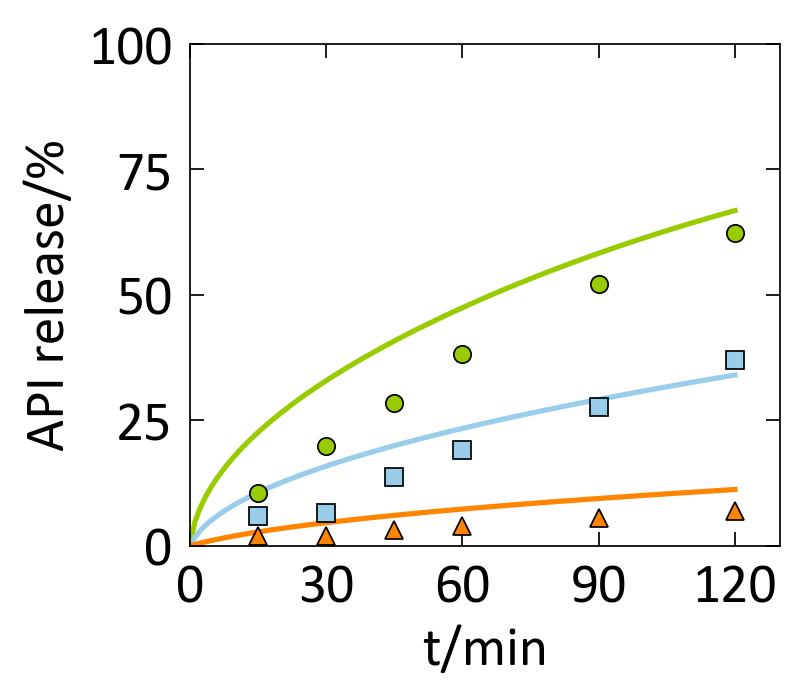

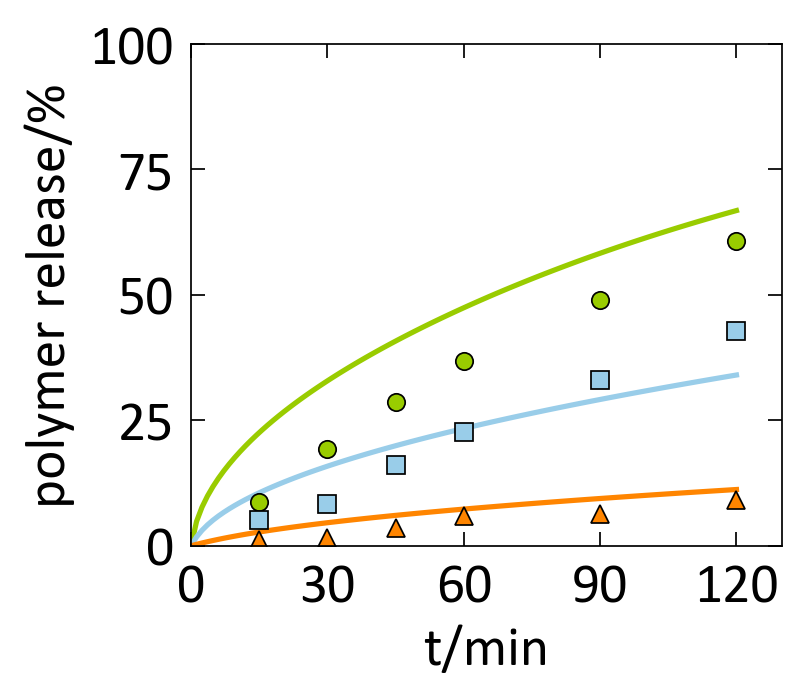

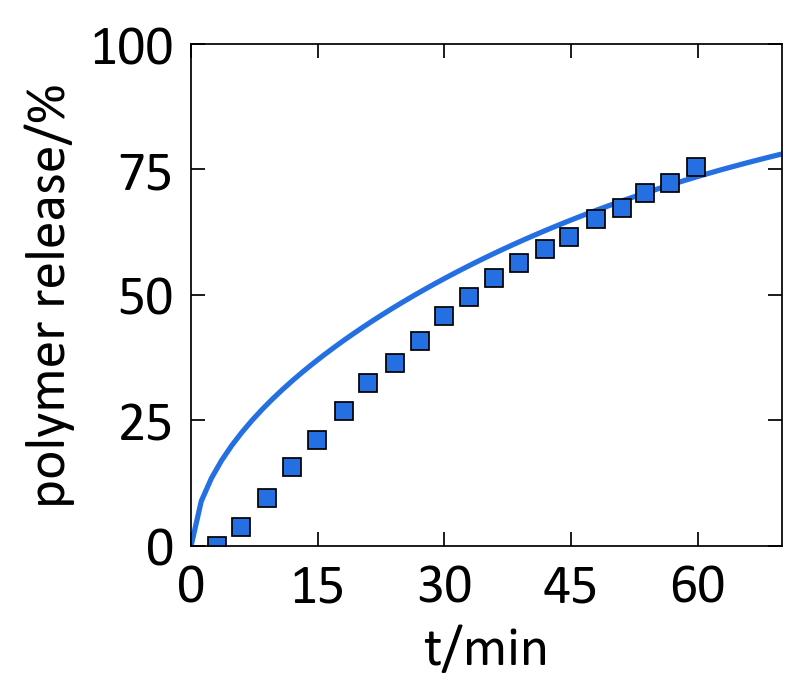

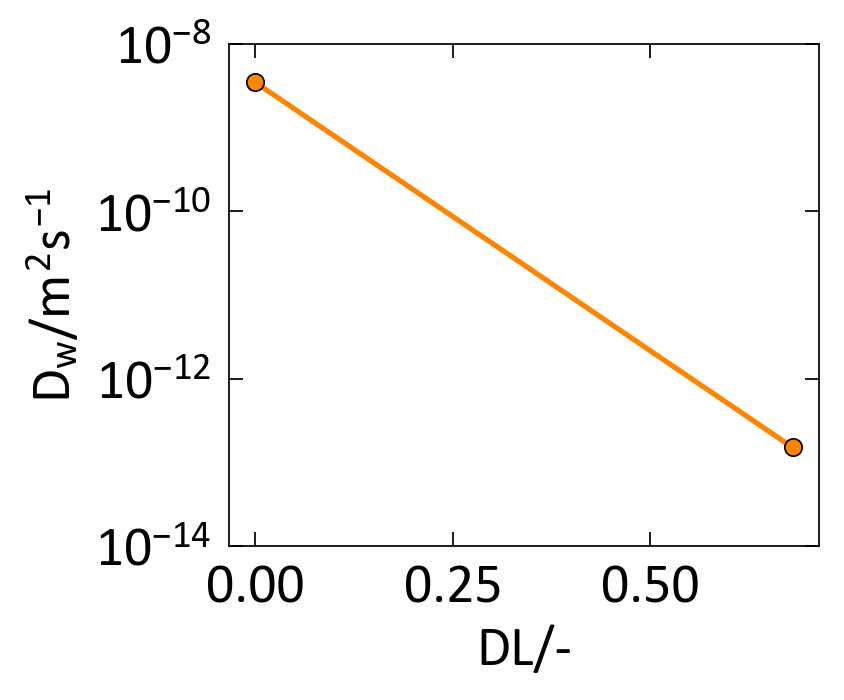

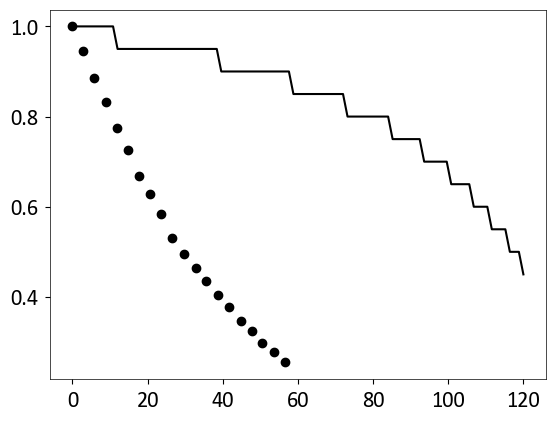

In [8]:
wt00,wtz00,_,_=Diffusion_MS(t,L00,Dvec00,wi000,wi800,Mi,mobile,full_output=True)
notreleased00=wt00/wi000
release00=(1-notreleased00)


fig,ax=plt.subplots()
ax.set_axisbelow(True)

ax.plot(t/60,release10[:,2]*100,"g-")
ax.plot(t/60,release20[:,2]*100,"c-")
ax.plot(t/60,release30[:,2]*100,"-r")

ax.plot(texp,relapi10,"go")
ax.plot(texp,relapi20,"cs")
ax.plot(texp,relapi30,"^r")



ax.set_xlabel("t/min")
ax.set_ylabel("API release/%")
# ax.set_ticks(0,120,0,100)
plt.ylim(0,100)
plt.xlim(0,130)


fig5,ax5=origin_like.subplots()
ax5.set_axisbelow(True)


# origin_like.plot(ax5,t/60,release00[:,1]*100,"g--")
ax5.plot(t/60,release10[:,1]*100,"g-")
ax5.plot(t/60,release20[:,1]*100,"c-")
ax5.plot(t/60,release30[:,1]*100,"-r")



# origin_like.plot(ax5,texp0,relpoly00,"gs")
ax5.plot(texp,relpoly10,"go")
ax5.plot(texp,relpoly20,"cs")
ax5.plot(texp,relpoly30,"^r")

ax5.set_xlabel("t/min")
ax5.set_ylabel("polymer release/%")
# origin_like.set_ticks(ax5,0,120,0,100)
plt.ylim(0,100)
plt.xlim(0,130)


plt.show()


fig6,ax6=origin_like.subplots()
ax6.set_axisbelow(True)


ax6.plot(t/60,release00[:,1]*100,"b-")
ax6.plot(texp0,relpoly00,"bs")

ax6.set_xlabel("t/min")
ax6.set_ylabel("polymer release/%")
# origin_like.set_ticks(ax6,0,60,0,100)
plt.ylim(0,100)
plt.xlim(0,70)



tex=np.array([0,2.808988764,5.805243446,8.988764045,11.79775281,14.79400749,17.79026217,20.59925094,23.59550562,26.5917603,29.7752809,32.77153558,35.58052434,38.76404494,41.76029963,44.75655431,47.75280899,50.56179775,53.55805243,56.55430712])
L0perL=np.array([1,0.946496815,0.885350318,0.831847134,0.774522293,0.724840764,0.667515924,0.629299363,0.58343949,0.529936306,0.495541401,0.464968153,0.434394904,0.403821656,0.377070064,0.346496815,0.323566879,0.296815287,0.277707006,0.25477707])


boundary=np.array([np.where(wtz00[i,0,:]>0.9)[0][0] for i in range(len(t))])/(len(wtz00[0,0,:])-1)
figl,axl=plt.subplots()

axl.plot(tex,L0perL,'ko')
axl.plot(t/60,boundary,'k-')
plt.show()


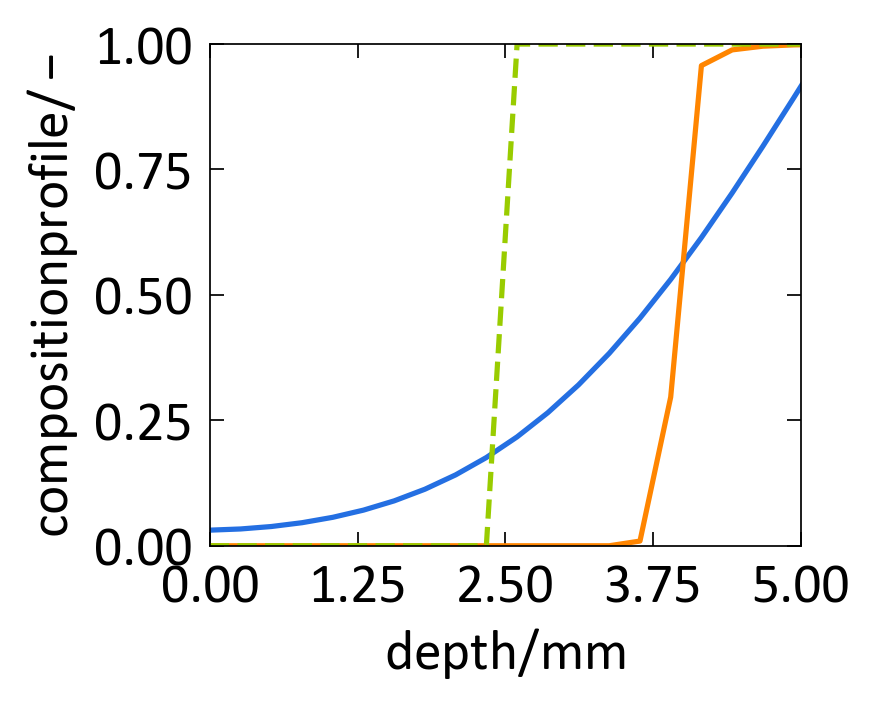

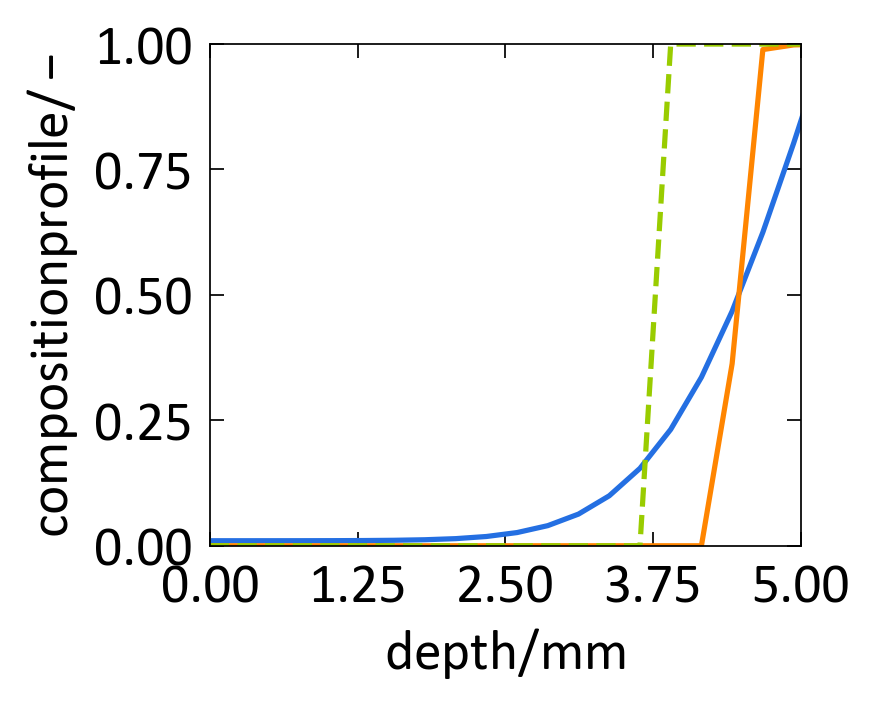

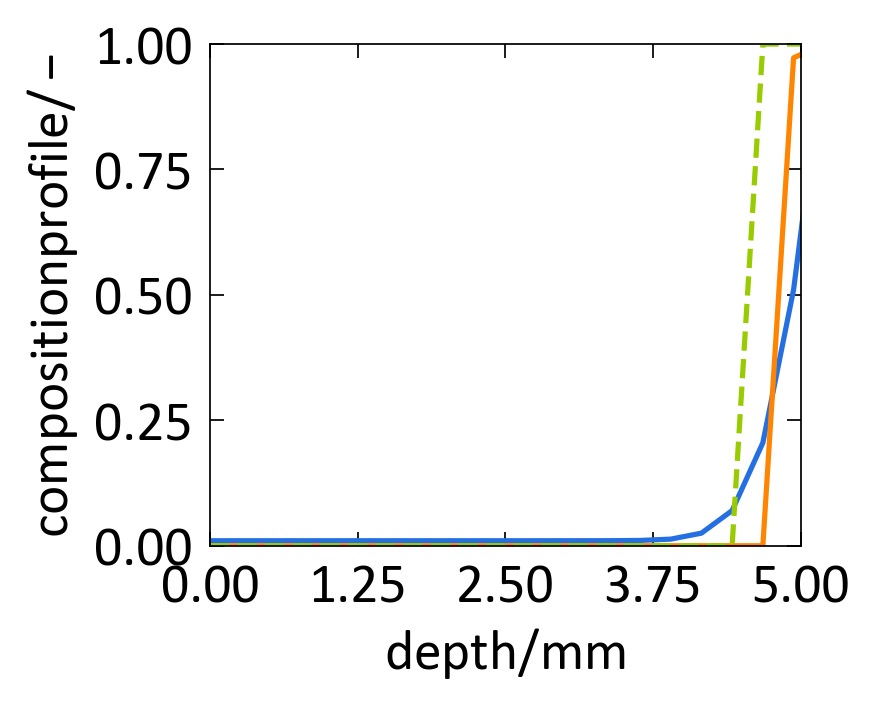

In [9]:

def TgGT(wi,Tg0i,q=0,Ki=None,rho0i=None):
    """
    Compute the glass transition temperature of a mixture  
    
    Args:
        wi (array_like): 2D Array of weight fractions [ number of components,number of Points]
        Tg0i (array_like): pure component glass transition temperature /K
        q (array_like): Kwei parameter /-
        rho0i (optional,array_like) : pure component densities /kg/m^3
        Ki (optional,array_like): Gordon-Taylor parameters         /-
    Returns:
        ndarray:   
        glass transition temperature of a mixture  /K 
    """
    nc=Tg0i.shape[0]
    qmat=np.zeros((nc,nc))
    qmat[np.triu_indices(nc, k=1)]=q
    Excess=np.asarray([np.sum(np.outer(wi[:,i],wi[:,i])*qmat) for i,val in enumerate(wi[0,:])])
    if Ki is None and rho0i is not None:
        Ideal=np.sum(wi*1/rho0i[:,None],axis=0)/np.sum(wi*1/rho0i[:,None]/Tg0i[:,None],axis=0)
    elif Ki is not None and rho0i is None:
        Ideal=np.sum(wi*Ki[:,None]*Tg0i[:,None],axis=0)/np.sum(wi*Ki[:,None],axis=0)
    elif Ki is None and rho0i is None:
        Ideal=np.sum(wi*1/rho0i[:,None],axis=0)
    else:
        Ideal=np.sum(wi*Ki[:,None]*Tg0i[:,None],axis=0)/np.sum(wi*Ki[:,None],axis=0)
    return Ideal+Excess

# from diffusionpy import DasDennisSpacing
# wspace=DasDennisSpacing.DasDennis(100,3)
tp=nt//5
wz10=wtz10[tp,:,:]
wz20=wtz20[tp,:,:]
wz30=wtz30[tp,:,:]
def aa_fun(wz):
    return np.exp([np.nan_to_num(lngi_fun(np.ascontiguousarray(wz[:,idx]))+np.log(wz[:,idx])) for idx in range(len(wz[-1,:]))])[:,2]
Tg0i=np.array([136,383.15,265.15])
Ki=np.array([1.,0.3,(136*997)/(265.15*1250)])
Tg10=TgGT(wz10,Tg0i,Ki=Ki)
Tg20=TgGT(wz20,Tg0i,Ki=Ki)
Tg30=TgGT(wz30,Tg0i,Ki=Ki)
aa10=aa_fun(wz10)
aa20=aa_fun(wz20)
aa30=aa_fun(wz30)
aSLE=0.06260015380257039
super10=(aa10-aSLE)>0
super20=(aa20-aSLE)>0
super30=(aa30-aSLE)>0
rubbery10=Tg10<(T-50)
rubbery20=Tg20<(T-50)
rubbery30=Tg30<(T-50)


# aa10=np.exp([np.nan_to_num(lngi_fun(np.ascontiguousarray(wtz10[:,i,-1]))+np.log(wtz[:,i,-1])) for i in range(len(wtz[:,i,-1]))])[:,2]


fig12,ax12=plt.subplots()
ax12.plot(zvec*1E3,wasser10[tp,:],"b-")
ax12.plot(zvec*1E3,alpha10[:,tp],"r-")
ax12.plot(zvec*1E3,rubbery10,"g--")
# origin_like.plot(ax12,zvec*1E3,super10,"m--")
fig13,ax13=plt.subplots()
ax13.plot(zvec*1E3,wasser20[tp,:],"b-")
ax13.plot(zvec*1E3,alpha20[:,tp],"r-")
ax13.plot(zvec*1E3,rubbery20,"g--")
# origin_like.plot(ax13,zvec*1E3,super20,"m--")
fig14,ax14=plt.subplots()
ax14.plot(zvec*1E3,wasser30[tp,:],"b-")
ax14.plot(zvec*1E3,alpha30[:,tp],"r-")
ax14.plot(zvec*1E3,rubbery30,"g--")
# origin_like.plot(ax14,zvec*1E3,super30,"m--")
# ax12.set_ticks(ax12,0,5,0,1)
# origin_like.set_ticks(ax13,0,5,0,1)
# origin_like.set_ticks(ax14,0,5,0,1)

ax12.set_ylabel("composition profile /-")
ax12.set_xlabel("depth /mm")
ax13.set_ylabel("composition profile /-")
ax13.set_xlabel("depth /mm")
ax14.set_ylabel("composition profile /-")
ax14.set_xlabel("depth /mm")

